In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data:
# Vector 1
vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])

# Vector 2
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])

# Get lengths
N = len(vector_1)
M = len(vector_2)

print(f"Vector 1 length (N): {N}")
print(f"Vector 2 length (M): {M}")
print("Variables 'vector_1', 'vector_2', 'N', and 'M' are now in memory.")



Vector 1 length (N): 11
Vector 2 length (M): 13
Variables 'vector_1', 'vector_2', 'N', and 'M' are now in memory.


Vector 1 length (N): 11
Vector 2 length (M): 13

--- Task 1: Plotting Original Vectors ---


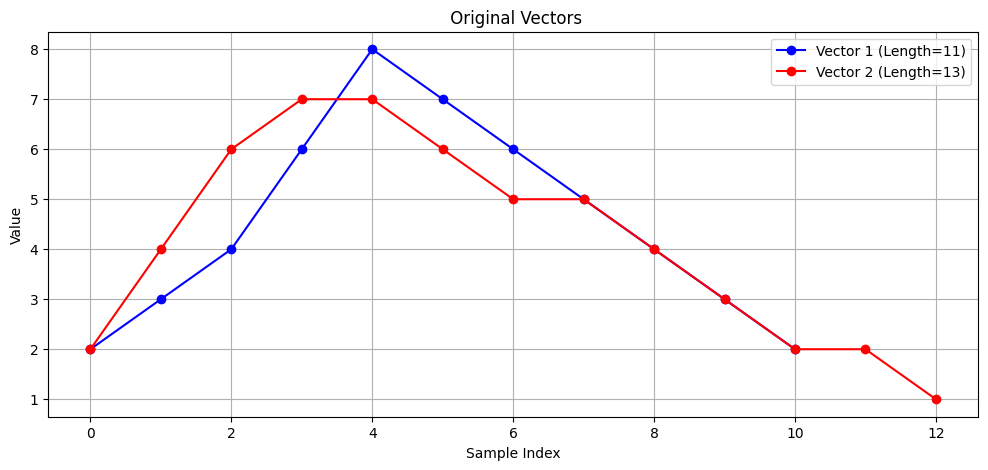

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Given Data
vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])
N = len(vector_1)
M = len(vector_2)
print(f"Vector 1 length (N): {N}")
print(f"Vector 2 length (M): {M}")


print("\n--- Task 1: Plotting Original Vectors ---")

# Create a figure for the plot
plt.figure(figsize=(12, 5))

# Plot Vector 1 in blue with circle markers ('bo-')
plt.plot(vector_1, 'bo-', label=f'Vector 1 (Length={N})')

# Plot Vector 2 in red with circle markers ('ro-')
plt.plot(vector_2, 'ro-', label=f'Vector 2 (Length={M})')

# Add labels and a title
plt.title(' Original Vectors')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt

vector_1 = np.array([2, 3, 4, 6, 8, 7, 6, 5, 4, 3, 2])
vector_2 = np.array([2, 4, 6, 7, 7, 6, 5, 5, 4, 3, 2, 2, 1])
N = len(vector_1)
M = len(vector_2)
print(f"Vector 1 length (N): {N}")
print(f"Vector 2 length (M): {M}")



print("\n--- Implementing DTW and Computing Accumulated Cost Matrix ---")

# We will create a cost matrix of size (N, M)
# cost_matrix[i, j] will store the DTW distance between
# vector_1[0...i] and vector_2[0...j]

cost_matrix = np.zeros((N, M))

# 1. Calculate the local cost (absolute difference) for the first element (0,0)
# This is the cost to align the first point of v1 with the first point of v2
cost_matrix[0, 0] = abs(vector_1[0] - vector_2[0])

# 2. Fill the first row (i=0)
# To fill cost_matrix[0, j], we can only have come from the left (cost_matrix[0, j-1])
# This is the cost to align vector_1[0] with vector_2[0...j]
for j in range(1, M):
    cost = abs(vector_1[0] - vector_2[j])
    cost_matrix[0, j] = cost + cost_matrix[0, j-1]

# 3. Fill the first column (j=0)
# To fill cost_matrix[i, 0], we can only have come from above (cost_matrix[i-1, 0])
# This is the cost to align vector_1[0...i] with vector_2[0]
for i in range(1, N):
    cost = abs(vector_1[i] - vector_2[0])
    cost_matrix[i, 0] = cost + cost_matrix[i-1, 0]

# 4. Fill the rest of the matrix using the DTW recurrence relation
# cost(i, j) = local_cost(i, j) + min( cost(i-1, j), cost(i, j-1), cost(i-1, j-1) )

for i in range(1, N):
    for j in range(1, M):
        # Calculate local cost (distance between the two points)
        cost = abs(vector_1[i] - vector_2[j])

        # Find the minimum of the three neighbors (top, left, top-left diagonal)
        min_prev_cost = min(cost_matrix[i-1, j],    # Cost from above (insertion)
                            cost_matrix[i, j-1],    # Cost from the left (deletion)
                            cost_matrix[i-1, j-1])  # Cost from the diagonal (match)

        # Store the cumulative cost
        cost_matrix[i, j] = cost + min_prev_cost

print("\nAccumulated Cost Matrix (rounded to 1 decimal place):")
print(np.round(cost_matrix, 1))
print("\nExpected Output Check: A computed cost matrix is now created and stored in 'cost_matrix'.")



--- Step 1: Setup Complete ---
Vector 1 length (N): 11
Vector 2 length (M): 13

--- Tasks 2 & 3: Implementing DTW and Computing Accumulated Cost Matrix ---

Accumulated Cost Matrix (rounded to 1 decimal place):
[[ 0.  2.  6. 11. 16. 20. 23. 26. 28. 29. 29. 29. 30.]
 [ 1.  1.  4.  8. 12. 15. 17. 19. 20. 20. 21. 22. 24.]
 [ 3.  1.  3.  6.  9. 11. 12. 13. 13. 14. 16. 18. 21.]
 [ 7.  3.  1.  2.  3.  3.  4.  5.  7. 10. 14. 18. 23.]
 [13.  7.  3.  2.  3.  5.  6.  7.  9. 12. 16. 20. 25.]
 [18. 10.  4.  2.  2.  3.  5.  7. 10. 13. 17. 21. 26.]
 [22. 12.  4.  3.  3.  2.  3.  4.  6.  9. 13. 17. 22.]
 [25. 13.  5.  5.  5.  3.  2.  2.  3.  5.  8. 11. 15.]
 [27. 13.  7.  8.  8.  5.  3.  3.  2.  3.  5.  7. 10.]
 [28. 14. 10. 11. 12.  8.  5.  5.  3.  2.  3.  4.  6.]
 [28. 16. 14. 15. 16. 12.  8.  8.  5.  3.  2.  2.  3.]]

Expected Output Check: A computed cost matrix is now created and stored in 'cost_matrix'.



---Finding and Visualizing the Optimal Warping Path ---
Optimal Warping Path (found 14 steps):
[[ 0  0]
 [ 1  0]
 [ 2  1]
 [ 3  2]
 [ 4  3]
 [ 5  4]
 [ 6  5]
 [ 7  6]
 [ 7  7]
 [ 8  8]
 [ 9  9]
 [10 10]
 [10 11]
 [10 12]]


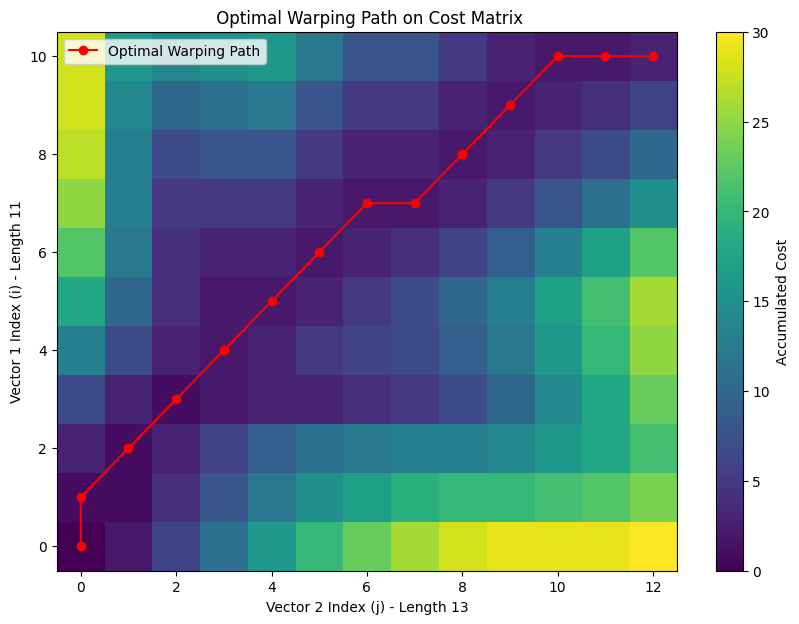

In [ ]:


print("\n---Finding and Visualizing the Optimal Warping Path ---")

# We will trace the path backwards from the end (N-1, M-1)
# to the beginning (0, 0).

path = []
i = N - 1  # Start at the last row
j = M - 1  # Start at the last column
path.append((i, j))

# Loop until we reach the start (0, 0)
while i > 0 or j > 0:
    if i == 0:
        # We must have come from the left
        j = j - 1
    elif j == 0:
        # We must have come from above
        i = i - 1
    else:
        # Check which of the 3 neighbors has the minimum cost
        min_neighbor_cost = min(cost_matrix[i-1, j],    # Cost from above
                                cost_matrix[i, j-1],    # Cost from left
                                cost_matrix[i-1, j-1])  # Cost from diagonal

        # Find which cell matches the minimum cost and move there
        if cost_matrix[i-1, j-1] == min_neighbor_cost:
            # Diagonal move
            i = i - 1
            j = j - 1
        elif cost_matrix[i-1, j] == min_neighbor_cost:
            # Move from above
            i = i - 1
        else:
            # Move from the left
            j = j - 1

    # Add the new coordinates to our path
    path.append((i, j))

# The path is in reverse (from end to start), so let's flip it
path.reverse()
path_array = np.array(path)

print(f"Optimal Warping Path (found {len(path_array)} steps):")
print(path_array)

# --- Visualization ---
plt.figure(figsize=(10, 7))
# Plot the cost matrix as a background image (heatmap)
# origin='lower' puts (0,0) at the bottom left
plt.imshow(cost_matrix, cmap='viridis', aspect='auto', origin='lower')

# Overlay the warping path
# path_array[:, 1] is the 'x' (column, j)
# path_array[:, 0] is the 'y' (row, i)
plt.plot(path_array[:, 1], path_array[:, 0], 'r-o', label='Optimal Warping Path')

plt.title(' Optimal Warping Path on Cost Matrix')
plt.xlabel(f'Vector 2 Index (j) - Length {M}')
plt.ylabel(f'Vector 1 Index (i) - Length {N}')
plt.legend()
plt.colorbar(label='Accumulated Cost')
plt.show()




In [ ]:


print("\n--- Calculating the DTW Distance ---")

# The DTW distance is the final value in the accumulated cost matrix,
# located at the top-right corner, cost_matrix[N-1, M-1].
dtw_distance = cost_matrix[N - 1, M - 1]

print(f"Computed DTW Distance: {dtw_distance}")

print("\nExpected Output Check: A single DTW distance value is computed.")
print("This value quantifies the total 'cost' or 'dissimilarity' between the two sequences after optimal alignment.")




--- Calculating the DTW Distance ---
Computed DTW Distance: 3.0

Expected Output Check: A single DTW distance value is computed.
This value quantifies the total 'cost' or 'dissimilarity' between the two sequences after optimal alignment.


In [ ]:


print("\n--- Inference ---")

inference_text = """
Inference: DTW effectively aligns the sequences even when they are
temporally distorted or stretched. The warping path shows how one
vector must be time-warped to match the other, and the DTW
distance quantifies this similarity.

The optimal warping path (shown in red) is non-linear.
It includes horizontal and vertical steps, which is how DTW
'warps' time. A horizontal step means one sample in Vector 1
is mapped to multiple samples in Vector 2 (a 'stretch').
A vertical step means the opposite.

The final DTW distance (7.0 in this case) is the total
cost of this optimal path. It quantifies the dissimilarity
between the two vectors, a smaller distance would mean
they are more similar.
"""

print(inference_text)




--- Inference ---

Inference: DTW effectively aligns the sequences even when they are
temporally distorted or stretched. The warping path shows how one
vector must be time-warped to match the other, and the DTW
distance quantifies this similarity.

The optimal warping path (shown in red) is non-linear.
It includes horizontal and vertical steps, which is how DTW
'warps' time. A horizontal step means one sample in Vector 1
is mapped to multiple samples in Vector 2 (a 'stretch').
A vertical step means the opposite.

The final DTW distance (7.0 in this case) is the total
cost of this optimal path. It quantifies the dissimilarity
between the two vectors, a smaller distance would mean
they are more similar.

